In [78]:
#csv FILE CONVERTED TO JSON
import pandas as pd
csv_data = pd.read_csv("D:/Downloads/booking.csv")

json_data = csv_data.to_json(r'D:/arangodb/hotels.json',orient = 'records')


In [79]:
!pip install pyarango --user

In [80]:
!pip install folium --upgrade


### establishing connection and linking with database


In [1]:
from pyArango.connection import *
conn = Connection(username="root", password="Taru@Arangodb01")

In [2]:
db=conn["Getting-Started"]

In [3]:
hot=db["Hotels"]
hot.count()

6002

In [14]:
hot.status
#3 stands for loaded 2 for unloaded

3

### Run query function

In [4]:
def runQuery(query):
    queryResult = db.AQLQuery(query, rawResults=True, batchSize=100)
    for key in queryResult:
        print(key)

In [61]:
query="""FOR h IN Hotels
  filter h.city == "new delhi"
  filter h.hotel_star_rating != null
  filter h.hotel_brand != null
  COLLECT rating = h.hotel_star_rating, brand= h.hotel_brand  WITH COUNT INTO length
  RETURN { 
    "rating" : rating, 
    "count" : length,
    "brand" :brand
  }"""
runQuery(query)

{'rating': '3-star hotel', 'count': 21, 'brand': 'OYO Rooms'}
{'rating': '5-star hotel', 'count': 3, 'brand': 'JW Marriott Hotels & Resorts'}


In [26]:
query="""FOR h IN Hotels
  LET recommendations = ( 
      FILTER h.room_count >= 5 
      CoLLECT hotel= h.property_name, City=h.city
      RETURN {"hotel ": hotel,"City": City}
  ) 
  RETURN recommendations """
runQuery(query)

[{'hotel ': 'Khirsu By GMVN', 'City': 'pauri'}]
[{'hotel ': 'Global Village Ooty', 'City': 'ooty'}]
[{'hotel ': 'TRH Pipalkoti', 'City': 'pīpalkoti'}]
[]
[]
[{'hotel ': 'The Hill Side', 'City': 'ooty'}]
[{'hotel ': 'Hotel Mountain Face', 'City': 'manāli'}]
[{'hotel ': 'Rahi Motel Haridwar', 'City': 'haridwār'}]
[]
[]
[{'hotel ': 'The Gaff in Kalimpong-Deluxe', 'City': 'kalimpong'}]
[]
[{'hotel ': 'Varsha Enclave- Trinity House', 'City': 'mysore'}]
[{'hotel ': 'Grand Hotel', 'City': 'haridwār'}]
[{'hotel ': 'Hotel Blue Bird', 'City': 'ooty'}]
[{'hotel ': 'Center Point Residency', 'City': 'ganpatipule'}]
[{'hotel ': 'Mistletoe Homestay & Cafe', 'City': 'munnar'}]
[]
[]
[{'hotel ': 'Ellays Dream Resort', 'City': 'solan'}]
[{'hotel ': 'Swisston Inn', 'City': 'new delhi'}]
[{'hotel ': 'Hotel Premdeep', 'City': 'mātherān'}]
[{'hotel ': 'The Clive and Curzon', 'City': 'ketti'}]
[]
[]
[{'hotel ': 'Grand Parkway', 'City': 'tambaram'}]
[{'hotel ': 'Hotel Aaryamaan', 'City': 'phaltan'}]
[{'hotel 

### update, insert, delete

In [121]:
query="""FOR p IN Hotels
  UPDATE {_key: p._key, city: LOWER(p.city)} IN Hotels"""
runQuery(query)

In [122]:
query="""insert {_key: "100032" , city: "kota"} IN Hotels
return NEW"""
runQuery(query)

{'_key': '100032', '_id': 'Hotels/100032', '_rev': '_f7Fg8p----', 'city': 'kota'}


In [124]:
query="""return document("Hotels/100032")"""
runQuery(query)

{'_key': '100032', '_id': 'Hotels/100032', '_rev': '_f7Fg8p----', 'city': 'kota'}


In [126]:
query="""remove document("Hotels/100032")"""


### cities and their count

In [42]:
property=[]
query = 'for hotel in Hotels let property=hotel.property_name return property'
queryResult = db.AQLQuery(query, rawResults=True, batchSize=100)
for key in queryResult:
   property.append(key)
   #print(key)
len(property)

6002

In [44]:
#documents = hot.fetchAll()
cities=[]
query = 'for hotel in Hotels let city=hotel.city return city'
queryResult = db.AQLQuery(query, rawResults=True, batchSize=100)
for key in queryResult:
   cities.append(key)
   #print(key)
len(cities)

6002

In [53]:
#documents = hot.fetchAll()
query = 'for hotel in Hotels COLLECT city=hotel.city with count into no Sort no DESC return {"city":city , "number": no}'
queryResult = db.AQLQuery(query, rawResults=True, batchSize=100)
for key in queryResult:
   print(key)


{'city': 'new delhi', 'number': 309}
{'city': 'bangalore', 'number': 193}
{'city': 'mumbai', 'number': 172}
{'city': 'jaipur', 'number': 163}
{'city': 'chennai', 'number': 152}
{'city': 'kolkata', 'number': 112}
{'city': 'srinagar', 'number': 106}
{'city': 'hyderabad', 'number': 106}
{'city': 'udaipur', 'number': 98}
{'city': 'ahmedabad', 'number': 92}
{'city': 'cochin', 'number': 89}
{'city': 'gurgaon', 'number': 89}
{'city': 'varanasi', 'number': 86}
{'city': 'mysore', 'number': 82}
{'city': 'agra', 'number': 81}
{'city': 'jaisalmer', 'number': 79}
{'city': 'pune', 'number': 75}
{'city': 'alleppey', 'number': 70}
{'city': 'rishīkesh', 'number': 70}
{'city': 'mussoorie', 'number': 67}
{'city': 'chandīgarh', 'number': 63}
{'city': 'calangute', 'number': 62}
{'city': 'varkala', 'number': 56}
{'city': 'noida', 'number': 56}
{'city': 'nagpur', 'number': 55}
{'city': 'shirdi', 'number': 52}
{'city': 'vadodara', 'number': 52}
{'city': 'dehradun', 'number': 51}
{'city': 'shimla', 'number': 4

In [52]:
#sorting hotels nearest to delhi airport
import pandas as plt
latitudes = []
longitudes = []
query="""for hotel in Hotels
filter hotel.city=='new delhi'
SORT DISTANCE(hotel.longitude,hotel.latitude,28.556160,77.100281)
return hotel"""
queryResult = db.AQLQuery(query, rawResults=True, batchSize=100)
for key in queryResult:
   #latitudes.append(key['coordinates'][1])
   #longitudes.append(key['coordinates'][0])
   print(key)
#plt.scatter(longitudes, latitudes)
#plt.show()
#print(latitudes)

{'_key': '56670', '_id': 'Hotels/56670', '_rev': '_f7FfZ3q--A', 'address': 'Plot No-3 C-Block Shyam Vihar Ph-2 Nahafgarh, 110043 New Delhi, India – Show map', 'city': 'new delhi', 'country': 'India', 'crawl_date': '2016-09-01', 'hotel_brand': None, 'hotel_description': 'Sweet House Najafgarh is set in New Delhi, 20 km from Qutub Minar and 20 km from Rashtrapati Bhavan. Free private parking is available on site. All rooms are equipped with a flat-screen TV with cable channels. All rooms include a private bathroom fitted with a shower. There is a shared lounge at the property. Jantar Mantar is 21 km from Sweet House Najafgarh, while India Gate is 23 km from the property. The nearest airport is Delhi International Airport, 10 km from the property.', 'hotel_facilities': 'Bathroom:Towels|Bathroom|Shower•Outdoors:Terrace•Room Amenities:Clothes rack•Pets:Pets are not allowed.•Media & Technology:Flat-screen TV|Cable Channels•Internet:No internet access available.•Parking:Free!\r\nFree private 

### function to display map



In [25]:
import folium
from IPython.display import display

def plot_graph(query,popup):
    queryResult = db.AQLQuery(query, rawResults=True, batchSize=100)
    latitudes=[]
    longitudes=[]
    for key in queryResult:
        latitudes.append(key['coordinates'][1])
        longitudes.append(key['coordinates'][0])
        map = folium.Map(location=[latitudes[0], longitudes[0]], zoom_start=12)
    for i in range(1,len(latitudes)-1):
        folium.Marker([latitudes[i],longitudes[i]], popup=popup[i]).add_to(map)
    return map


### plotting 5star hotels in india

In [69]:
query="""for hotel in Hotels
filter hotel.hotel_star_rating=='5-star hotel' or hotel.hotel_star_rating=='5 stars'
let property=hotel.property_name
return Geo_Point(hotel.longitude,hotel.latitude)"""
runQuery(query)


{'type': 'Point', 'coordinates': [82.8412191953, 25.2632040662]}
{'type': 'Point', 'coordinates': [77.0423676074, 28.452794845]}
{'type': 'Point', 'coordinates': [70.7906034934, 26.9074743079]}
{'type': 'Point', 'coordinates': [76.2137926045, 10.5204022505]}
{'type': 'Point', 'coordinates': [80.1950504198, 12.625106794]}
{'type': 'Point', 'coordinates': [80.1950504198, 12.625106794]}
{'type': 'Point', 'coordinates': [73.7826355733, 15.5275680304]}
{'type': 'Point', 'coordinates': [77.4908435944, 10.2445070027]}
{'type': 'Point', 'coordinates': [77.1899456946, 28.5863659538]}
{'type': 'Point', 'coordinates': [88.3725371319, 22.56380242]}
{'type': 'Point', 'coordinates': [77.1899456946, 28.5863659538]}
{'type': 'Point', 'coordinates': [77.1899456946, 28.5863659538]}
{'type': 'Point', 'coordinates': [77.4908435944, 10.2445070027]}
{'type': 'Point', 'coordinates': [73.9335720241, 15.2358046935]}
{'type': 'Point', 'coordinates': [73.9361084962, 15.2218048806]}
{'type': 'Point', 'coordinates

In [70]:
plot_graph(query, property)

### Plotting hotels in Goa

In [54]:
l=[]
query="""for h in Hotels
FILTER h.country == "India"
filter h.state=="Goa"
let property=h.property_name
RETURN GEO_POINT(h.longitude,h.latitude)"""
plot_graph(query,property )

In [56]:
query="""for hotel in Hotels
filter hotel.city=='new delhi'
filter DISTANCE(28.556160,77.100281,hotel.longitude,hotel.latitude)
let property=hotel.property_name
return Geo_Point(hotel.longitude,hotel.latitude)  """
queryResult = db.AQLQuery(query, rawResults=True, batchSize=100)
for key in queryResult:
   print(key)
#delhii hotels

{'type': 'Point', 'coordinates': [77.213036567, 28.6455608082]}
{'type': 'Point', 'coordinates': [77.2158930075, 28.6458455955]}
{'type': 'Point', 'coordinates': [77.213036567, 28.6455608082]}
{'type': 'Point', 'coordinates': [77.1298576577, 28.5494401485]}
{'type': 'Point', 'coordinates': [77.1275433164, 28.5483580812]}
{'type': 'Point', 'coordinates': [77.2110096551, 28.6420928498]}
{'type': 'Point', 'coordinates': [77.2159958817, 28.6458050263]}
{'type': 'Point', 'coordinates': [77.1250091493, 28.6997803286]}
{'type': 'Point', 'coordinates': [77.1899456946, 28.5863659538]}
{'type': 'Point', 'coordinates': [77.1899456946, 28.5863659538]}
{'type': 'Point', 'coordinates': [77.2117450833, 28.6409485102]}
{'type': 'Point', 'coordinates': [77.1899456946, 28.5863659538]}
{'type': 'Point', 'coordinates': [77.2152815759, 28.6404351767]}
{'type': 'Point', 'coordinates': [77.2159781149, 28.645807533]}
{'type': 'Point', 'coordinates': [77.2902774811, 28.4996273283]}
{'type': 'Point', 'coordinat

### plotting graph of all hotels in delhi

In [57]:
map=plot_graph(query,property)
map

### Graph Traversal

In [131]:
query="""for too in Hotels
    filter lower(too.city)=="bangalore"
for fromm in Places
 filter lower(fromm.City)=="bangalore"
insert{_from:fromm._id, _to:too._id, property_name:too.property_name, city:fromm.City, Place: fromm.Place} into newt
"""
runQuery(query)

In [73]:
import networkx as nx
import matplotlib.pyplot as plt

In [74]:
G=nx.Graph()

In [75]:
query='''for v,e,p IN 1..1 outbound
'Places/270324' newt
options {uniqueVertices : 'global', bfs:true}
LIMIT 50
Return p'''
queryResult = db.AQLQuery(query, rawResults=True, batchSize=100)
for path in queryResult:
    #print(path)
    for vertex in path['vertices']:
        #print(vertex)
        G.add_node(vertex['_id'])
        break
    for edge in path['edges']:
        print(edge)
        G.add_edge(edge['_from'], edge['_to'])
        break
    

{'_key': '3061224', '_id': 'newt/3061224', '_from': 'Places/270324', '_to': 'Hotels/52076', '_rev': '_f5Nn9_e---', 'property_name': 'Treebo Raj Premier', 'city': 'bangalore', 'Place': ' 1. Relax in Lal Bagh '}
{'_key': '3061276', '_id': 'newt/3061276', '_from': 'Places/270324', '_to': 'Hotels/52092', '_rev': '_f5Nn9_i--l', 'property_name': 'Hotel Select', 'city': 'bangalore', 'Place': ' 1. Relax in Lal Bagh '}
{'_key': '3061328', '_id': 'newt/3061328', '_from': 'Places/270324', '_to': 'Hotels/52110', '_rev': '_f5Nn9_q--D', 'property_name': 'Maple Green Suites/Deluxe', 'city': 'bangalore', 'Place': ' 1. Relax in Lal Bagh '}
{'_key': '3061380', '_id': 'newt/3061380', '_from': 'Places/270324', '_to': 'Hotels/52168', '_rev': '_f5Nn9_u--O', 'property_name': 'Octave Suites - Residency Rd', 'city': 'bangalore', 'Place': ' 1. Relax in Lal Bagh '}
{'_key': '3061432', '_id': 'newt/3061432', '_from': 'Places/270324', '_to': 'Hotels/52179', '_rev': '_f5Nn9_2--P', 'property_name': 'Amigo Serviced A

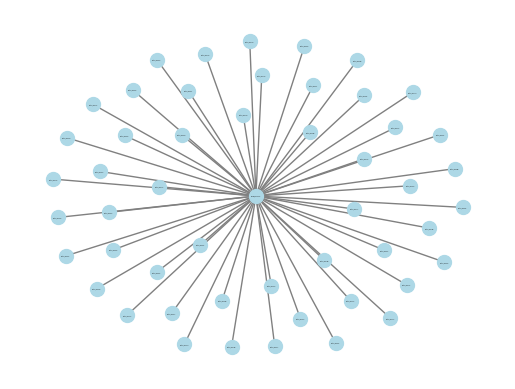

In [76]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=100)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=1, font_family='sans-serif')
plt.axis('off')
plt.show()

## ArangoSearch

In [88]:
k=[]
query="""for c in firstView
search analyzer(MIN_MATCH(PHRASE(c.hotel_facilities, "air conditioning"),
PHRASE(c.hotel_facilities, "TV"),
PHRASE(c.hotel_facilities ,"Wifi"),
PHRASE(c.hotel_facilities,"maid"),3),'text_en')
return {"hotel_name" :c.property_name, "facilities" : c.hotel_facilities}"""
queryResult = db.AQLQuery(query, rawResults=True, batchSize=100)
for key in queryResult:
    print(key)
    k.append(key['hotel_name'])


{'hotel_name': 'Khirsu By GMVN', 'facilities': 'Bathroom:Toilet paper|Linen|Towels|Bathroom|Toilet•Bedroom:Wardrobe/Closet•View:Mountain view|View•Room Amenities:Clothes rack•Pets:Pets are not allowed.•Living Area:Seating Area|Desk•Media & Technology:Satellite Channels|TV•Food & Drink:Breakfast in the room•Internet:Free!\r\nWiFi is available in public areas and is free of charge.•Parking:Free!\r\nFree public parking is possible on site (reservation is not needed).•Services:Daily maid service|Shuttle service (surcharge)|Wake-up service|Car hire|Room service•General:Designated smoking area|Non-smoking throughout|Tile/Marble floor|Heating|Fan|Non-smoking rooms|Newspapers'}
{'hotel_name': 'The Hill Side', 'facilities': 'Miscellaneous:Non-smoking rooms•Bathroom:Toilet paper|Linen|Towels|Bathroom|Toilet|Hairdryer•Bedroom:Wardrobe/Closet•Outdoors:Terrace•Kitchen:Electric kettle•Room Amenities:Clothes rack|Tile/Marble floor|Soundproofing|Ironing Facilities•Services & Extras:Wake-up service•Pet

In [92]:
query="""for c in firstView
search analyzer(MIN_MATCH(PHRASE(c.hotel_facilities, "air conditioning"),
PHRASE(c.hotel_facilities, "TV"),
PHRASE(c.hotel_facilities ,"Wifi"),
PHRASE(c.hotel_facilities,"maid"),3),'text_en')
limit 7
return GEO_POINT(c.longitude,c.latitude)"""
runQuery(query)


{'type': 'Point', 'coordinates': [78.7937736511, 30.1237487546]}
{'type': 'Point', 'coordinates': [76.7185994983, 11.4134596475]}
{'type': 'Point', 'coordinates': [76.9610819221, 8.4271373645]}
{'type': 'Point', 'coordinates': [76.630641818, 12.3360295188]}
{'type': 'Point', 'coordinates': [77.0104949176, 10.0180910562]}
{'type': 'Point', 'coordinates': [77.0758867216, 30.8887883435]}
{'type': 'Point', 'coordinates': [77.213036567, 28.6455608082]}


In [91]:
plot_graph(query,property)

### diving deep into arango search and graph

In [97]:
query="""FOR d IN firstView
 SEARCH ANALYZER(MIN_MATCH(
 PHRASE(d.state, 'Rajasthan'),
 PHRASE(d.room_type, 'Budget Double Room'),
 PHRASE(d.hotel_description, 'nearest airport'),3
 ),'text_en')
 LIMIT 20
 RETURN {address: d.address,STATE: d.state, hotel_description : d.hotel_description}"""
runQuery(query)

{'address': 'Bus Stand Nathdwara, 313301 Nāthdwāra, India – Show map', 'STATE': 'Rajasthan', 'hotel_description': 'Hotel Gwal offers accommodation in Nāthdwāra. Guests can enjoy the on-site restaurant. Each room is equipped with a flat-screen TV. Some units include a seating area to relax in after a busy day. You will find a 24-hour front desk at the property. The nearest airport is Maharana Pratap Airport, 35 km from the property.'}
{'address': '346 .4th B Road, Sardarpura,Jodhpur.Rajasthan, 342003 Jodhpur, India – Show map', 'STATE': 'Rajasthan', 'hotel_description': 'The Gandhi International is located in Jodhpur, 2.2 km from Mehrangarh Fort. Guests can enjoy the on-site restaurant. Free WiFi is available throughout the property and free private parking is available on site. The rooms are equipped with a private bathroom. You will find a 24-hour front desk at the property. The hotel also offers car hire. Jaswant Thada is 3.1 km from The Gandhi International, while Umaid Bhawan Palac

In [74]:
query="""FOR d IN firstView
 SEARCH PHRASE(d.Place_desc,'adventure sports','text_en')
 RETURN {address: d.Place,
 distance:d.Distance,
    hotel_description : d.Place_desc}"""
runQuery(query)

{'address': ' 2. Engage in the Adventures of Solang Valley ', 'distance': ' 8 km  from city center ', 'hotel_description': ' Solang Valley is one of the most popular tourist destinations in Himachal Pradesh. It is popular for adventure sports. During winters, Solang valley is covered with snow making skiing is a popular sport here. There are training institutes and trainers located to supervise skiers and train beginners.  '}
{'address': ' 5. Rohtang Pass ', 'distance': ' 16 km  from city center ', 'hotel_description': " Rohtang pass is the stretch which connects Manali to Himachal's more dreamy and dessert-like landscapes, Spiti and Lahaul. This vast snow desert is a landscape like only a few other and a view one should not miss. Popular adventure sports here are sledge ride, mountain biking, and skiing. Many blockbusters ranging from 'Jab We Met' to 'Yeh Jawani Hai Deewani' have been shot here.\xa0 "}
{'address': ' 38. Hampta Valley ', 'distance': ' 14 km  from city center ', 'hotel_

In [73]:
query="""FOR d IN firstView
 SEARCH PHRASE(d.hotel_description,'private parking','text_en')
 RETURN {address: d.address,
    hotel_description : d.hotel_description}
"""
runQuery(query)

{'address': 'Kaathadimattam, Balacola Post, NEAR Siva Tea Factory, Ooty, 643203 Ooty, India – Great location -', 'hotel_description': "Situated in Ooty in the Tamil Nadu Region, 8 km from Ooty Lake, Global Village Ooty features a barbecue, children's playground and terrace. Good Shepherd International School is 5 km away. Free WiFi is offered throughout the property and free private parking is available on site. Each unit is equipped with a private bathroom with free toiletries and a hairdryer. Towels are available. Guests can enjoy the high altitude on-site restaurant. The property also offers packed lunches. Bike hire is available at the property and the area is popular for cycling. The Lawrence School Lovedale\u200b is 6 km from Global Village Ooty, while Laidlaw Memorial School is 7 km from the property. The nearest airport is Coimbatore International Airport, 51 km from Global Village Ooty."}
{'address': 'PIPALKOTI, 246472 Pīpalkoti, India – Show map', 'hotel_description': 'TRH Pi

In [98]:
query="""FOR d IN firstView
 SEARCH ANALYZER(MIN_MATCH(
 PHRASE(d.city, 'mumbai'),
 PHRASE(d.hotel_star_rating, '3star'),
 PHRASE(d.hotel_description, 'nearest airport'),2
 ),'text_en')
 LIMIT 20
 RETURN {address: d.address,facilities: d.hotel_facilities,
 No_Room: d.room_count,hotel_description : d.hotel_description}
"""
runQuery(query)

{'address': 'Harish Premises Co-op. Society, 205/206, S. V. Road, Opp Andheri Railway Station, Andheri West, 400058 Mumbai, India – Show map', 'facilities': 'Bathroom:Towels|Bathroom|Toilet|Free toiletries|Shower•Bedroom:Wardrobe/Closet•View:City view•Room Amenities:Clothes rack•Pets:Pets are not allowed.•Media & Technology:Cable Channels|Satellite Channels|TV•Internet:Free!\r\nWiFi is available in the hotel rooms and is free of charge.•Parking:Free!\r\nFree private parking is possible on site (reservation is not needed).•Reception services:Concierge service|ATM/cash machine on site|Luggage storage|Tour desk|Currency exchange|24-hour front desk•Cleaning services:Daily maid service|Trouser press|Shoeshine|Ironing service|Dry cleaning|Laundry•General:Airport shuttle (surcharge)|Designated smoking area|Air conditioning|Non-smoking throughout|Wake-up service|Lift|Fan|Ironing Facilities|Non-smoking rooms|Newspapers|Wake Up Service/Alarm Clock|Room service•Languages spoken:', 'No_Room': 24, 

In [99]:
query="""FOR d IN firstView
 SEARCH ANALYZER(MIN_MATCH(
 PHRASE(d.city, 'bangalore'),
 PHRASE(d.hotel_star_rating, '4'),
 PHRASE(d.hotel_description, 'nearest airport'),2
 ),'text_en')
 LIMIT 20
 RETURN {address: d.address,City: d.city,
 No_Room: d.room_count,Property:d.property_name,
  Property_type: d.property_type,Room_type:d.room_type}

"""
runQuery(query)

{'address': 'laxman sahay lane , station road, 823002 Gaya, India – Great location -', 'City': 'gaya', 'No_Room': 16, 'Property': 'Hotel Prem', 'Property_type': '204', 'Room_type': 'Deluxe Double Room (2 Adults + 1 Child)'}
{'address': '# 32,12th cross, 1st Stage, Indiranagar, Indiranagar, 560038 Bangalore, India – This neighbourhood is a great choice for travellers interested in pubs, warm weather, and friendly people – Check location Great location -', 'City': 'bangalore', 'No_Room': 1, 'Property': 'Treebo Raj Premier', 'Property_type': '208', 'Room_type': 'Standard Double Room'}
{'address': 'No.3, 4th Cross Road, 80 Feet Road, Green Leaf Layout, Behind Barista Coffee Bar Koramangala 4th Block, Karnataka 560095, Koramangala, 560034 Bangalore, India – This neighbourhood is a great choice for travellers interested in nightlife, pubs, and restaurants – Check location Show map', 'City': 'bangalore', 'No_Room': 20, 'Property': 'Maple Green Suites/Deluxe', 'Property_type': '204', 'Room_typ

In [101]:
query="""FOR d IN firstView
 SEARCH ANALYZER(MIN_MATCH(
 PHRASE(d.hotel_facilities, 'Pet'),
 PHRASE(d.hotel_star_rating, '3'),
 PHRASE(d.hotel_description, 'nearest airport'),3
 ),'text_en')
 RETURN {address: d.address,City: d.city,
 No_Room: d.room_count,Property:d.property_name,
  Property_type: d.property_type,Room_type:d.room_type}"""
runQuery(query)

{'address': 'DHUlESHWAR GARDEN, SARDAR PATEL MARG, C SCHEME, 302001 Jaipur, India – Show map', 'City': 'jaipur', 'No_Room': 20, 'Property': 'Chirmi Palace Hotel', 'Property_type': '204', 'Room_type': 'Deluxe Double or Twin Room'}
{'address': 'DHUlESHWAR GARDEN, SARDAR PATEL MARG, C SCHEME, 302001 Jaipur, India – Show map', 'City': 'jaipur', 'No_Room': 20, 'Property': 'Chirmi Palace Hotel', 'Property_type': '204', 'Room_type': 'Deluxe Double or Twin Room'}
{'address': 'DHUlESHWAR GARDEN, SARDAR PATEL MARG, C SCHEME, 302001 Jaipur, India – Show map', 'City': 'jaipur', 'No_Room': 20, 'Property': 'Chirmi Palace Hotel', 'Property_type': '204', 'Room_type': 'Deluxe Double or Twin Room'}
{'address': 'mitaiwala choraha gomtinagar lko, 226010 Lucknow, India – Show map', 'City': 'lucknow', 'No_Room': 35, 'Property': 'hotel vaibhav inn', 'Property_type': '204', 'Room_type': 'Executive King Room'}
{'address': 'Kurakkanni, North Cliff, 695141 Varkala, India – Show map', 'City': 'varkala', 'No_Room'

In [102]:
query="""FOR d IN firstView
 SEARCH ANALYZER(MIN_MATCH(
 PHRASE(d.city, 'bangalore'),
 PHRASE(d.hotel_star_rating, '3'),
 PHRASE(d.hotel_description, 'travellers interested in nightlife,pubs'),2
 ),'text_en')
 LIMIT 20
 RETURN {address: d.address,facilities: d.hotel_facilities,
 No_Room: d.room_count,Property:d.property_name,
  Property_type: d.property_type,Room_type:d.room_type}
"""
runQuery(query)

{'address': '# 32,12th cross, 1st Stage, Indiranagar, Indiranagar, 560038 Bangalore, India – This neighbourhood is a great choice for travellers interested in pubs, warm weather, and friendly people – Check location Great location -', 'facilities': 'Bathroom:Toilet paper|Linen|Towels|Bathroom|Toilet|Free toiletries|Shower•Bedroom:Wardrobe/Closet•Kitchen:Refrigerator•Pets:Pets are not allowed.•Living Area:Seating Area|Desk•Media & Technology:Flat-screen TV|Satellite Channels|Telephone|TV•Food & Drink:Restaurant•Internet:Free!\r\nWiFi is available in all areas and is free of charge.•Parking:Free!\r\nFree private parking is possible on site (reservation is needed).•Services:Daily maid service|Ironing service|Dry cleaning|Laundry|24-hour front desk|Room service•General:Designated smoking area|Air conditioning|Lift|Fan|Ironing Facilities|Safety Deposit Box', 'No_Room': 1, 'Property': 'Treebo Raj Premier', 'Property_type': '208', 'Room_type': 'Standard Double Room'}
{'address': 'No.3, 4th Cr

In [103]:
query="""FOR d IN firstView
 SEARCH ANALYZER(MIN_MATCH(
 PHRASE(d.city, 'varanasi'),
 PHRASE(d.hotel_star_rating, '5star'),
 PHRASE(d.hotel_description, 'Vishwanath Temple'),2
 ),'text_en')
 LIMIT 20
 RETURN {address: d.address,facilities: d.hotel_facilities,
 No_Room: d.room_count,hotel_description : d.hotel_description}

"""
runQuery(query)

{'address': 'CK. 7/148/155, Mohalla Siddheshwari, Sindhiya Ghat, Govindpura,, 221001 Varanasi, India – Show map', 'facilities': 'Bathroom:Linen|Towels|Towels/Sheets (extra fee)|Additional Toilet|Bath or Shower|Bathroom|Toilet|Free toiletries|Shower•Bedroom:Wardrobe/Closet|Dressing Room•View:Riverview|Lake view|View•Outdoors:BBQ facilities•Kitchen:Dining table|Cleaning products|Electric kettle|Refrigerator•Room Amenities:Clothes rack•Pets:Pets are not allowed.•Living Area:Fireplace|Desk•Media & Technology:Satellite Channels|Telephone|TV•Food & Drink:Restaurant (à la carte)|Breakfast in the room|Restaurant|Minibar|Tea/Coffee Maker•Internet:Free!\r\nWiFi is available in public areas and is free of charge.•Parking:Free!\r\nFree private parking is possible on site (reservation is not needed).•Reception services:Lockers|Ticket service|Tour desk|Currency exchange|Express check-in/check-out|24-hour front desk•Cleaning services:Daily maid service|Trouser press|Shoeshine|Ironing service|Dry clea

In [104]:
query="""FOR d IN firstView
 SEARCH ANALYZER(MIN_MATCH(
 PHRASE(d.city, 'varanasi'),
 PHRASE(d.hotel_star_rating, '5star'),
 PHRASE(d.hotel_description, 'Dasaswamedh Ghat'),2
 ),'text_en')
 LIMIT 20
 RETURN {address: d.address,facilities: d.hotel_facilities,
 No_Room: d.room_count,hotel_description : d.hotel_description}

"""
runQuery(query)

{'address': 'CK. 7/148/155, Mohalla Siddheshwari, Sindhiya Ghat, Govindpura,, 221001 Varanasi, India – Show map', 'facilities': 'Bathroom:Linen|Towels|Towels/Sheets (extra fee)|Additional Toilet|Bath or Shower|Bathroom|Toilet|Free toiletries|Shower•Bedroom:Wardrobe/Closet|Dressing Room•View:Riverview|Lake view|View•Outdoors:BBQ facilities•Kitchen:Dining table|Cleaning products|Electric kettle|Refrigerator•Room Amenities:Clothes rack•Pets:Pets are not allowed.•Living Area:Fireplace|Desk•Media & Technology:Satellite Channels|Telephone|TV•Food & Drink:Restaurant (à la carte)|Breakfast in the room|Restaurant|Minibar|Tea/Coffee Maker•Internet:Free!\r\nWiFi is available in public areas and is free of charge.•Parking:Free!\r\nFree private parking is possible on site (reservation is not needed).•Reception services:Lockers|Ticket service|Tour desk|Currency exchange|Express check-in/check-out|24-hour front desk•Cleaning services:Daily maid service|Trouser press|Shoeshine|Ironing service|Dry clea